In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
import os
import skimage.filters

from google.colab import drive, files
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
images = []
labels = []
SIZE = 256

for directory_path in glob.glob("/content/drive/MyDrive/ML_IPData7/*"):
    label = directory_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        images.append(img)
        labels.append(label)

Rifle
Golf cart


In [ ]:
images = np.array(images)
type(labels)
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
labelencoder = LabelEncoder()
labelencoder.fit(labels)
enc_labels = labelencoder.transform(labels)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, enc_labels, test_size = 0.20, random_state = 10)

X_train.shape

(585, 256, 256, 3)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(256, 256, 3)),
  tf.keras.layers.Conv2D(128, 5, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 5, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 5, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(2)
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 252, 252, 128)       │           9,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 126, 126, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 122, 122, 64)        │         204,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 57, 57, 32)          │          51,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,477,474 (13.27 MB)

 Trainable params: 3,477,474 (13.27 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

mc = ModelCheckpoint(
    filepath='best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

In [ ]:
history = model.fit(
  X_train, y_train,
  validation_data=(X_test, y_test),
  epochs=20,
  callbacks=[es, mc]
)

Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 520ms/step - accuracy: 0.7313 - loss: 0.6324
Epoch 1: val_loss improved from inf to 0.32788, saving model to best_model.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.7356 - loss: 0.6268 - val_accuracy: 0.8980 - val_loss: 0.3279
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.8596 - loss: 0.4032
Epoch 2: val_loss improved from 0.32788 to 0.28798, saving model to best_model.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 191ms/step - accuracy: 0.8597 - loss: 0.4029 - val_accuracy: 0.8980 - val_loss: 0.2880
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.8585 - loss: 0.4297
Epoch 3: val_loss did not improve from 0.28798
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 176ms/step - accuracy: 0.8593 - loss: 0.4267 - val_accuracy: 0.8980 - val_loss: 0.6145
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.8787 - loss: 0.2922
Epoch 4: val_loss did not improve from 0.28798
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 173ms/step - accu

In [ ]:
from tensorflow import keras
model = keras.models.load_model('best_model.keras')
pred = model.predict(X_test)
predicted_classes = np.argmax(pred, axis=1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step


              precision    recall  f1-score   support

           0       0.73      0.53      0.62        15
           1       0.95      0.98      0.96       132

    accuracy                           0.93       147
   macro avg       0.84      0.76      0.79       147
weighted avg       0.93      0.93      0.93       147



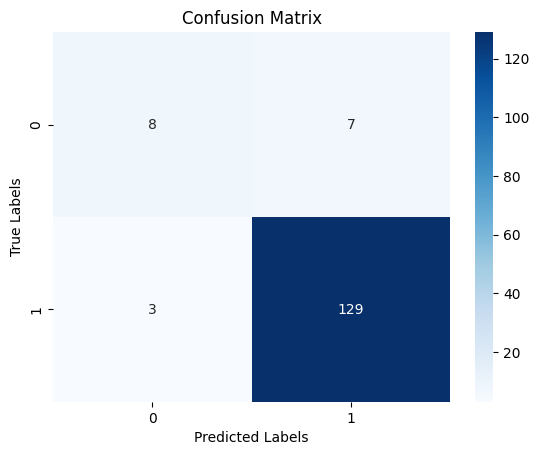

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

print(classification_report(y_test, predicted_classes))

cm = confusion_matrix(y_test, predicted_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

